In [27]:
import numpy as np 
import xarray as xr 
import pandas as pd

In [28]:
def apply_mask(darray, sftlf_file, realm):
    """Mask ocean or land using a sftlf (land surface fraction) file.
   
    Args:
     darray (xarray.DataArray): Data to mask
     sftlf_file (str): Land surface fraction file
     realm (str): Realm to mask
   
    """
  
    dset = xr.open_dataset(sftlf_file)
  
    if realm == 'land':
        masked_darray = darray.where(dset['sftlf'].data < 50)
    else:
        masked_darray = darray.where(dset['sftlf'].data > 50)   
  
    return masked_darray

## ***Land Masking***

In [29]:
file_pattern = "D:\Min\Review GCM\MIROC6\SSP585\Pr\pr_day_MIROC6_ssp585_r1i1p1f1_gn_*.nc"
pr = xr.open_mfdataset(file_pattern)

In [30]:
file_pattern = "D:\Min\Review GCM\MIROC6\SSP585\Tas\\tas_day_MIROC6_ssp585_r1i1p1f1_gn_*.nc"
tas = xr.open_mfdataset(file_pattern)

In [187]:
file_pattern = "D:\Min\Review GCM\BCC-CSM2-MR\SSP585\Hur\\*.nc"
hur = xr.open_mfdataset(file_pattern)

c:\Users\USER2\anaconda3\Lib\site-packages\dask\array\slicing.py:647: RuntimeWarning: overflow encountered in scalar multiply
  maxsize = math.ceil(nbytes / (other_numel * itemsize))
c:\Users\USER2\anaconda3\Lib\site-packages\xarray\core\indexing.py:1449: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
c:\Users\USER2\anaconda3\Lib\site-packages\dask\array\slicing.py:647: RuntimeWarning: overflow encountered in scalar multiply
  maxsize = math.ceil(nbytes / (other_numel * itemsize))
c:\Users\USER2\anaconda3\Lib\site-packages\xarray\core\indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk.

In [36]:
pr = pr["pr"]

In [37]:
tas = tas["tas"]

In [188]:
hur1= hur.copy()

In [189]:
hur1 = hur1.where(hur1["plev"] == 100000, drop=True)

c:\Users\USER2\anaconda3\Lib\site-packages\dask\array\slicing.py:647: RuntimeWarning: overflow encountered in scalar multiply
  maxsize = math.ceil(nbytes / (other_numel * itemsize))
c:\Users\USER2\anaconda3\Lib\site-packages\xarray\core\indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [190]:
hur1 = hur1["hur"]

In [40]:
clipped_pr = apply_mask(pr, sftlf_file = "D:\Min\Review GCM\MIROC6\SSP585\sftlf_fx_MIROC6_pdSST-piArcSIC_r1i1p1f1_gn.nc", realm = "ocean" )

In [41]:
clipped_pr = clipped_pr.sel(time = slice("2051-01-01", "2090-12-31"))

In [42]:
clipped_tas = apply_mask(tas, sftlf_file = "D:\Min\Review GCM\MIROC6\SSP585\sftlf_fx_MIROC6_pdSST-piArcSIC_r1i1p1f1_gn.nc", realm = "ocean" )

In [43]:
clipped_tas = clipped_tas.sel(time = slice("2051-01-01", "2090-12-31"))

In [192]:
clipped_hur = apply_mask(hur1, sftlf_file = "D:\Min\Review GCM\BCC-CSM2-MR\SSP585\sftlf_fx_BCC-CSM2-MR_hist-resIPO_r1i1p1f1_gn.nc", realm = "ocean" )

In [193]:
clipped_hur = clipped_hur.sel(time = slice("2051-01-01", "2090-12-31"))

In [46]:
clipped_pr.to_netcdf("D:\Min\Review GCM\MIROC6\SSP585\\land_masked_pr_MIROC6_ssp585_2051-2090.nc")

In [47]:
clipped_tas.to_netcdf("D:\Min\Review GCM\MIROC6\SSP585\\land_masked_tas_MIROC6_ssp585_2051-2090.nc")

In [207]:
clipped_hur.to_netcdf("D:\Min\Review GCM\BCC-CSM2-MR\SSP585\Interpolated\Hur\\land_masked_hur_BCC-CSM2-MR_ssp585_2051-2090.nc")

In [194]:
clipped = clipped_hur.sel(time = '2051-01-01')

In [195]:
clipped = clipped.to_dataframe()

In [196]:
clipped = clipped.dropna()

In [202]:
df = clipped.copy()

In [203]:
df = df.reset_index()

In [204]:
df = df[df.lat > -60]

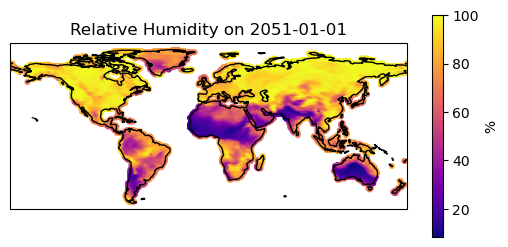

In [206]:
# Example 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

lons = df['lon'].values
lats = df['lat'].values
precipitation = df['hur'].values 

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

num_colors = 100

cmap = plt.get_cmap('plasma', num_colors)

norm = plt.Normalize(precipitation.min(), precipitation.max())
sc = ax.scatter(lons, lats, c=precipitation, cmap=cmap, norm=norm, s=10)
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, orientation='vertical', label='%')

ax.coastlines()
#ax.gridlines()
plt.title("Relative Humidity on 2051-01-01")
# Show the plot
plt.show()
